In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

Use this to estimate a smooth kernel density.

In [2]:
kde = KernelDensity(bandwidth=5.0, kernel='gaussian')

Make some fake 'population' data

In [3]:
N = 5000
N2 = N // 2

In [4]:
x = [i for i in range(N)]

Let make it bimodal so that it's clearly *not* a Normal Gaussian distribution

In [5]:
y = np.zeros(N)
y[0:N2] = np.random.normal(100,15,N2)
y[N2:] = np.random.normal(75,5,N2 )
print(min(y),max(y))

42.387446822824444 155.7152009589928


In [6]:
x_d = np.linspace(40, 160, N)

In [7]:
y = y.reshape(N,1)

In [8]:
kde.fit(y)

KernelDensity(algorithm='auto', atol=0, bandwidth=5.0, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

In [9]:
logp = kde.score_samples(x_d.reshape(N,1))

Make use of plt.subplot for five plots within one figure

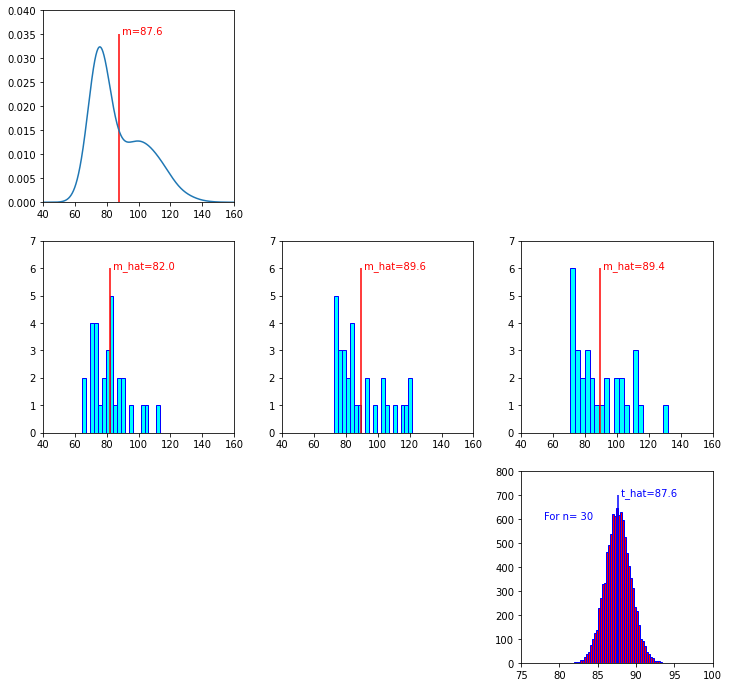

In [10]:
#just use the mean as the 'derived property'
m  = np.mean(y)
mt = f' m={m:0.1f}'

fig = plt.figure(figsize=(12,12))

plt.subplot(331);

plt.subplots_adjust(hspace=0.2,wspace=0.25)

#plot1: The Population
plt.plot(x_d,np.exp(logp))
plt.xlim(40,160)
plt.ylim(0,0.04)
#plt.title('Population Probability Distribution, F\nwith some derived property, m\n(both unknown)')
plt.text(m,0.035,mt,color='r')
plt.vlines(m,0,0.035,color='r')

#plots 2, 3 & 4 samples with n=30 for three empiricle distributions
plt.subplot(334)
t = 6
yh = np.random.choice(y[:,0],30,False)
m = np.mean(yh)
mt = f' m_hat={m:0.1f}'
plt.hist(yh,bins=20,edgecolor='blue',color='cyan')
plt.xlim(40,160)
plt.ylim(0,7)
#plt.title('Empirical Probability Distribution, F_hat\nwith estimated property, m_hat\n based on 30 samples')
plt.text(m,t,mt,color='r')
plt.vlines(m,0,t,color='r')

plt.subplot(335)
yh = np.random.choice(y[:,0],30,False)
m = np.mean(yh)
mt = f' m_hat={m:0.1f}'
plt.hist(yh,bins=20,edgecolor='blue',color='cyan')
plt.xlim(40,160)
plt.ylim(0,7)
#plt.title('Empirical Probability Distribution, F_hat\nwith estimated property, m_hat\n based on 30 samples')
plt.text(m,t,mt,color='r')
plt.vlines(m,0,t,color='r')

plt.subplot(336)
yh = np.random.choice(y[:,0],30,False)
m = np.mean(yh)
mt = f' m_hat={m:0.1f}'
plt.hist(yh,bins=20,edgecolor='blue',color='cyan')
plt.xlim(40,160)
plt.ylim(0,7)
#plt.title('Empirical Probability Distribution, F_hat\nwith estimated property, m_hat\n based on 30 samples')
plt.text(m,t,mt,color='r')
plt.vlines(m,0,t,color='r')

#do 10000 n=30 samples and calculate m
m = []
for i in range(10000):
    yh = np.random.choice(y[:,0],100,False)
    m.append(np.mean(yh))

mn = np.mean(m)
mt = f' t_hat={mn:0.1f}'

#plot 5: the sampling distribution of m
plt.subplot(339)
t = 700
plt.hist(m,bins=50,color='r',edgecolor='b')
plt.xlim(75,100)
plt.ylim(0,800)
#plt.title('Empirical Sampling Distribution of m_hat\nwith estimated property\n t_hat, an estimate of the population property m')
plt.text(mn,t,mt,color='b')
plt.vlines(mn,0,t,color='b')
plt.text(78,600,'For n= 30',color='b')
plt.show()

Screen-snip the figure and add text + arrows using photo editor or other suitable software. [I used Powerpoint]